<a href="https://colab.research.google.com/github/ayedsalman/Tensor-Flow/blob/master/Simple_classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import random as randint
import sklearn.preprocessing as MinMaxscalar
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [0]:
# read data from external csv file
import pandas as pd
import io 
from google.colab import files

uploaded = files.upload()
#read csv data format from uploaded file
data = pd.read_csv(io.BytesIO(uploaded['mydata.csv']))
data.head()



In [4]:
# split the data into training and testing, you need to know the title of the class column 
y=data.sick
x=data.drop('sick',axis=1)
#train_sample, test_sample = train_test_split(np.array(data), test_sizes=0.2)
#y.head()

train_sample,test_sample,train_label,test_label = train_test_split(x,y,test_size=0.2, random_state=42)
train_sample.head()
print(len(train_label))

200


In [0]:
train_sample = np.array(train_sample)
train_label = np.array(train_label)

train_samples = train_sample / 100
print (train_samples, train_label)


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [0]:
model.summary()

In [0]:
#printing the weights of the network
for layer in model.layers:
    weights = layer.get_weights()
print(weights)

#printing the structure of the network
#from keras.utils import plot_model

#plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [0]:
history = model.fit(train_samples, train_label, validation_split=0.2, batch_size=10, epochs=40, shuffle=True, verbose=2)

In [0]:
#plotting accuracy for training and validation
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,40)

plt.plot(epochs, loss_train,'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'y', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
test_sample = np.array(test_sample)
test_label = np.array(test_label)

test_samples = test_sample /100

print(test_samples, test_label)

In [12]:
#checking accuracy of a model vs test data
prediction = model.predict_classes(test_samples, batch_size=10)
accu = model.evaluate(test_label, prediction ,verbose=1)

#print(len(prediction))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2/2 [==============================] - 0s 1ms/step - loss: 1.2564 - accuracy: 0.2200


In [0]:
#another manual way of checking accuracy
acc =0
total = 0
for i,j in zip(prediction,test_label):
    print(i, ' ', j)
    if i==j:
        acc += 1
    total += 1
print("accuracy of prediction =",acc/total)

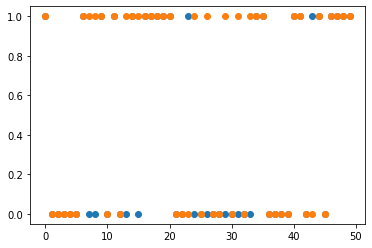

In [13]:
#draw accuracy
epochs = range(0,50)
fig = plt.figure()
plt.scatter(epochs, prediction)
plt.scatter(epochs, test_label)
plt.show()

In [0]:
#saving and retreiving the figure
fig.savefig('my_figure.png')
!ls -lh my_figure.png

from IPython.display import Image
Image('my_figure.png')


In [0]:
#saving  the model onto local hardrisk

import pandas as pd
import io 
from google.colab import files

model.save('mymodel.h5')
files.download('mymodel.h5') 



---





# **The following sections used for manual randomly generated training and testing data for educational purpose**

In [0]:
#user generated train sample: 
train_label = []
train_sample = []

for i in range(25):
  random_younger = np.random.randint(13,64)
  train_sample.append(random_younger)
  train_label.append(1)

  random_older = np.random.randint(65,100)
  train_sample.append(random_older)
  train_label.append(0)

for i in range(1000):
  random_younger = np.random.randint(13,64)
  train_sample.append(random_younger)
  train_label.append(0)

  random_older = np.random.randint(65,100)
  train_sample.append(random_older)
  train_label.append(1)

for i in range(25):
  random_younger = np.random.randint(13,64)
  train_sample.append(random_younger)
  train_label.append(1)

  random_older = np.random.randint(65,100)
  train_sample.append(random_older)
  train_label.append(0)

#print(train_sample)
#print(train_label)

In [0]:
# predicting the model using user-generated test-samples
# first generate test sets.
test_sample = []
test_label = []
for i in range(10):
  random_younger = np.random.randint(13,64)
  test_sample.append(random_younger)
  test_label.append(1)

  random_older = np.random.randint(65,100)
  test_sample.append(random_older)
  test_label.append(0)

for i in range(100):
  random_younger = np.random.randint(13,64)
  test_sample.append(random_younger)
  test_label.append(0)

  random_older = np.random.randint(65,100)
  test_sample.append(random_older)
  test_label.append(1)

for i in range(10):
  random_younger = np.random.randint(13,64)
  test_sample.append(random_younger)
  test_label.append(1)

  random_older = np.random.randint(65,100)
  test_sample.append(random_older)
  test_label.append(0)